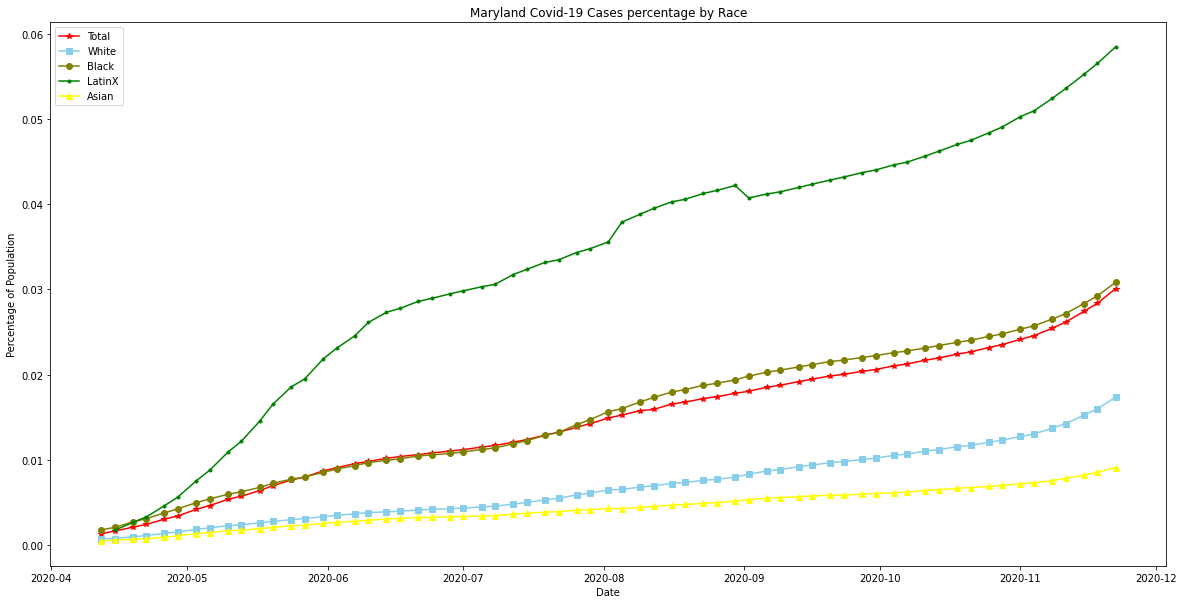

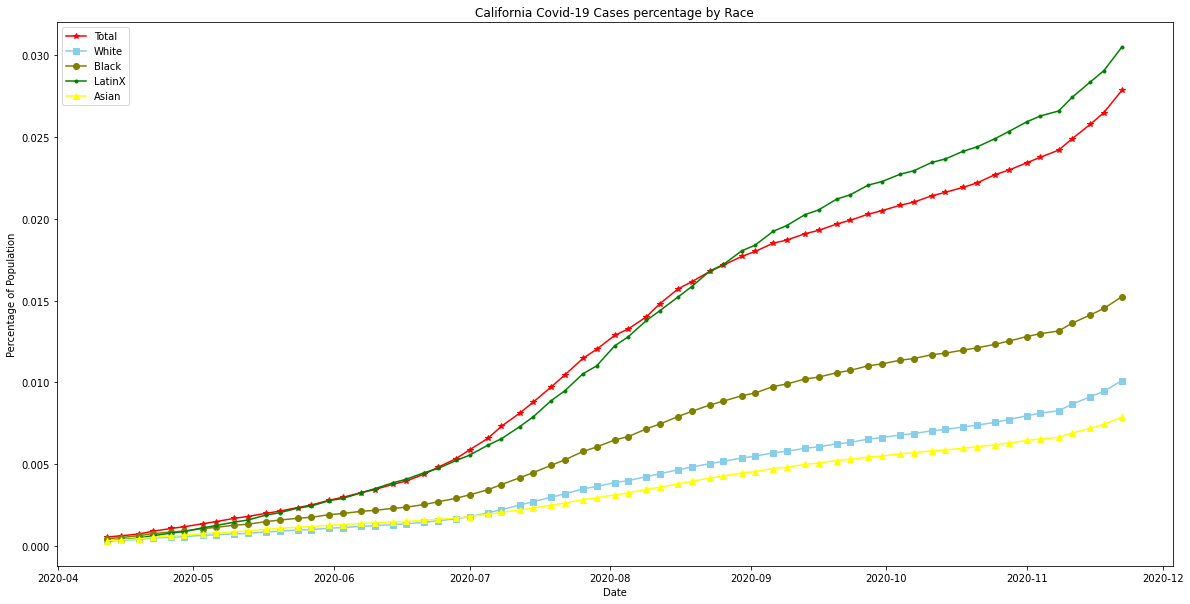

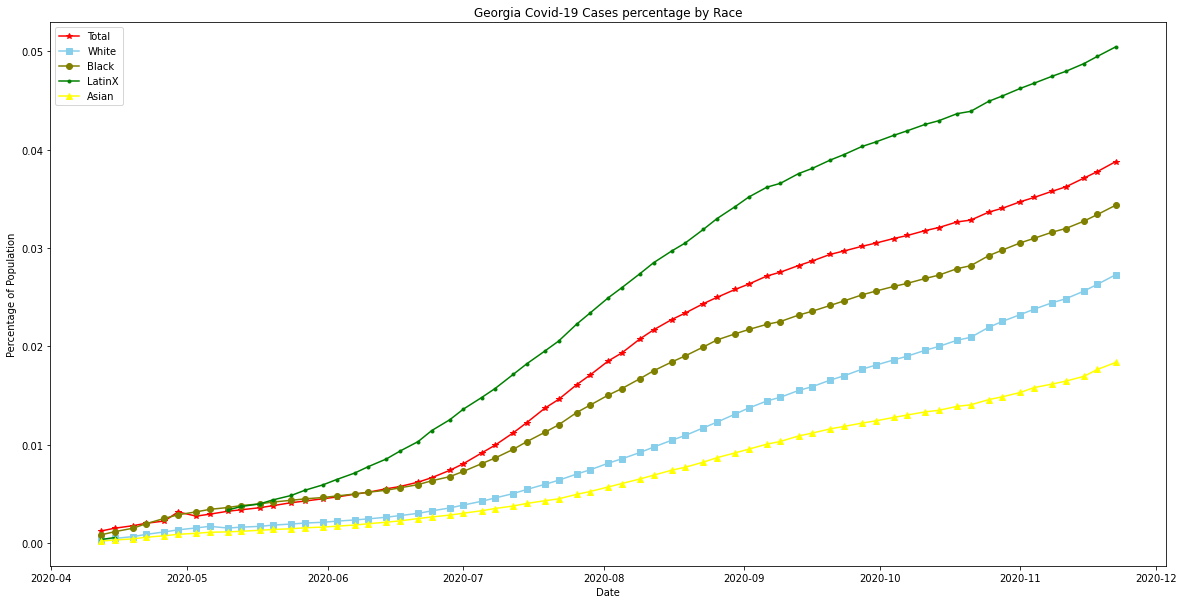

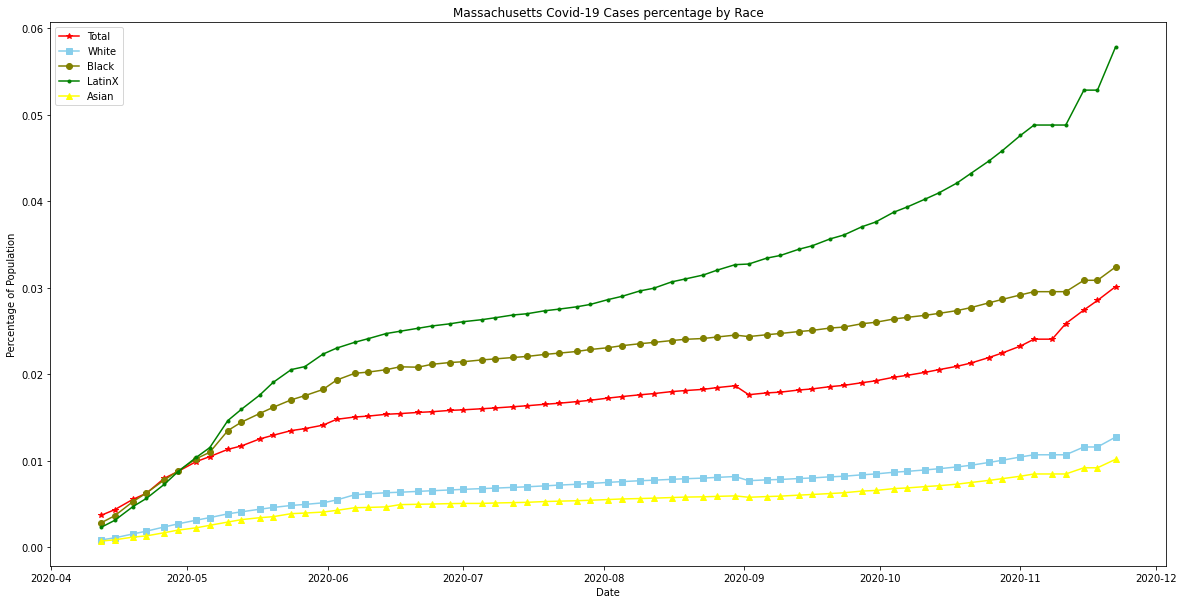

In [31]:
import csv, pandas as pd, matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
def racial(state, stateCode):
    populations_by_races = pd.read_csv("US_Population_By_State.csv", thousands=',')
    populations = populations_by_races.query(f"State == '{state}'")
    populations

    races = pd.read_csv("COVID-19_Race_By_States.csv")
    races = races.query(f"State == '{stateCode}'")
    races["Cases_Total_Percentage"] = pd.to_numeric(races["Cases_Total"], downcast='float').div(populations["Total population"].values[0])
    races["Cases_White_Percentage"] = pd.to_numeric(races["Cases_White"], downcast='float').div(populations["Non-Hispanic White"].values[0])
    races["Cases_Black_Percentage"] = races["Cases_Black"].div(populations["Non-Hispanic Black"].values[0])
    races["Cases_LatinX_Percentage"] = races["Cases_LatinX"].div(populations["Hispanic (of any race)"].values[0])
    races["Cases_Asian_Percentage"] = races["Cases_Asian"].div(populations["Non-Hispanic Asian"].values[0])
    
    races["Date"] = pd.to_datetime(races["Date"], format='%Y%m%d')

    plt.figure(figsize=(20,10)) 
    plt.plot(races["Date"], races["Cases_Total_Percentage"], marker="*", color='red', label='Total')
    plt.plot(races["Date"], races["Cases_White_Percentage"], marker="s", color='skyblue', label='White')
    plt.plot(races["Date"], races["Cases_Black_Percentage"], marker="o", color='olive', label='Black')
    plt.plot(races["Date"], races["Cases_LatinX_Percentage"], marker=".", color='green', label='LatinX')
    plt.plot(races["Date"], races["Cases_Asian_Percentage"], marker="^", color='yellow', label='Asian')
    plt.title(f'{state} Covid-19 Cases percentage by Race')
    plt.ylabel('Percentage of Population')
    plt.xlabel('Date')
    plt.legend()

racial("Maryland", "MD")
racial("California", "CA")
racial("Georgia", "GA")
racial("Massachusetts", "MA")


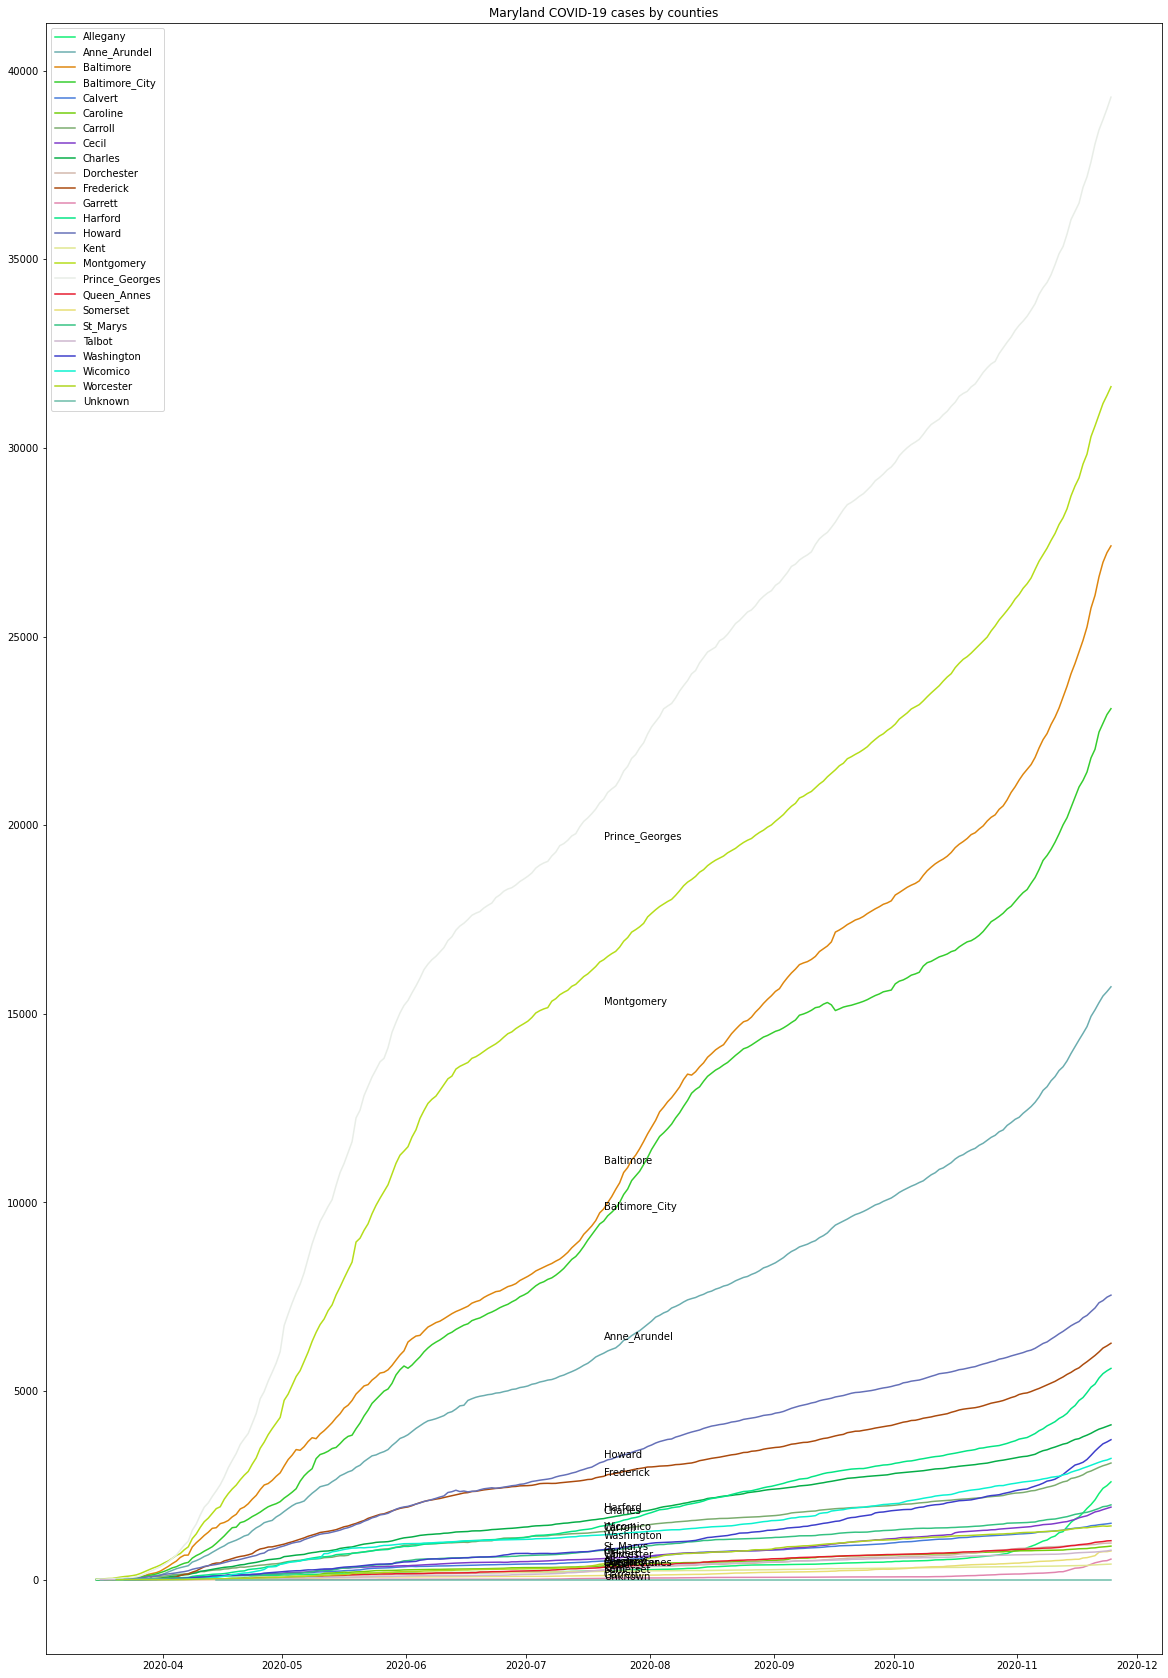

In [25]:
import csv, pandas as pd, matplotlib.pyplot as plt
import random
def mdCountiesCases():
    md = pd.read_csv("MD_COVID_By_County.csv")
    md.head()
    md["DATE"] = pd.to_datetime(md["DATE"])

    plt.figure(figsize=(20,30))
    plt.title("Maryland COVID-19 cases by counties")
    for i in range(2, len(md.columns)):
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        county = md.columns[i]
        plt.plot(md["DATE"], md[county], color=color, label=county)
        plt.annotate(md.columns[i], xy=(md["DATE"].mean(),md[county].mean()), xycoords='data')
    plt.legend()
    
mdCounties()

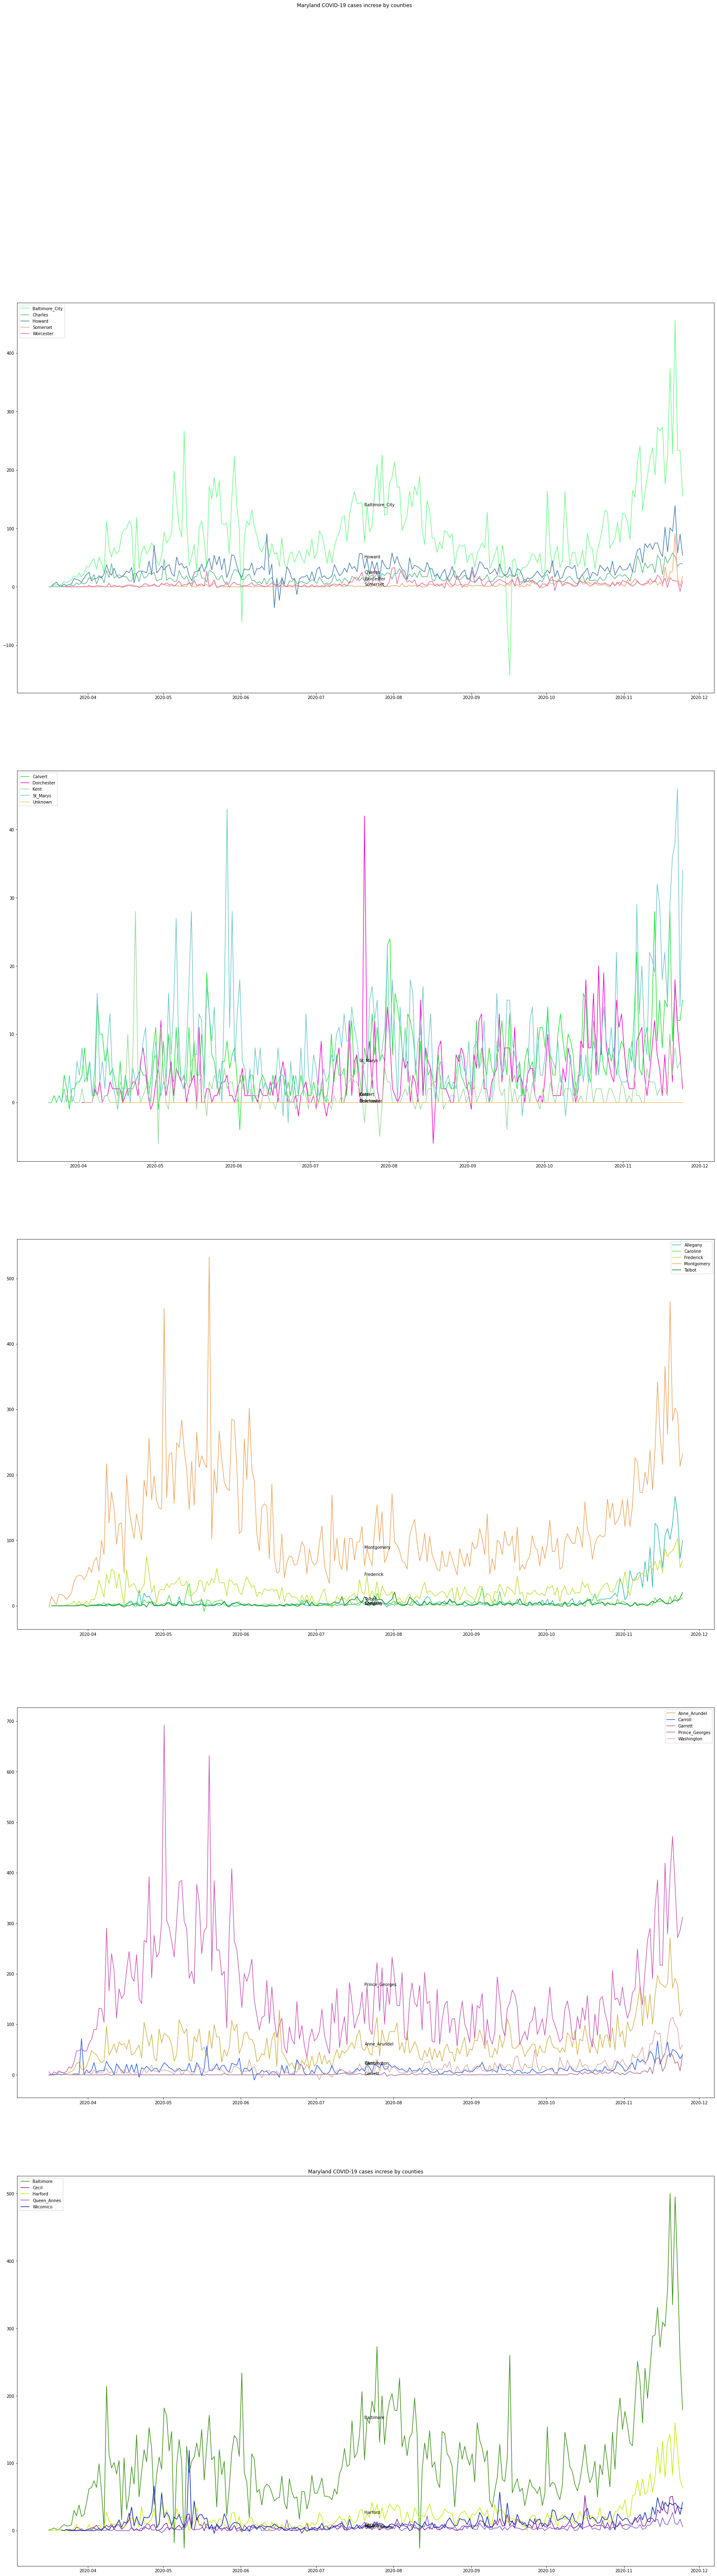

In [26]:
import random
def mdCountiesIncreaes():
    md = pd.read_csv("MD_COVID_By_County.csv")
    md.head()
    md["DATE"] = pd.to_datetime(md["DATE"])
    diff = md.diff()
    diff["DATE"] = pd.to_datetime(md["DATE"])

    fig, axs = plt.subplots(5, figsize=(30,100))
    fig.suptitle('Maryland COVID-19 cases increse by counties')

    plt.title("Maryland COVID-19 cases increse by counties")
    for i in range(2, len(diff.columns)):
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        axs[i % 5].plot(diff["DATE"], diff[diff.columns[i]], color=color, label=diff.columns[i])
        axs[i % 5].annotate(diff.columns[i], xy=(diff["DATE"].mean(),diff[diff.columns[i]].values[round(len(diff.index) / 2)]), xycoords='data')
        axs[i % 5].legend()

mdCountiesIncreaes()